In [2]:
#combin returns subsets of size k of X
def combin (X, k):
    if k == 0:
        return [[]]
    if X == []:
        return []
    else:
        A = [] 
        x = X[0] 
        Y = X[1:] 
        A = combin (Y, k) 
        for n in combin (Y,k-1): 
            y = [x]+n 
            A.append(y) 
        return A 

In [3]:
#given a tree mod m and an element a, gives us the ways in which we can insert a
def insertoptions (m, tree, atoms, done, a): 
    options = [] 
    for n in done: 
        if modsub(m, a, n) in atoms: 
             options.append ((n,a)) 
    return options 

In [4]:
#function for modular subtraction
def modsub(m, a, b):
    if a-b >= 0 and a-b < m:
        return a-b
    else:
        if a-b < 0:
            return (a-b)+m
        else:
            return (a-b)-m

In [5]:
#given a tree, returns the elements that are already present
def doneintree(tree):
    if tree==[]:
        return []
    else:
        if tree[0][1] not in doneintree(tree[1:]):
            return [tree[0][1]]+doneintree(tree[1:])
        else:
            return doneintree(tree[1:])
        

In [6]:
#given a tree, returns its atoms (elements that cover 0)
def atomsintree(tree):
    if tree == []:
        return []
    else:
        if tree[0][0] == 0:
            return [tree[0][1]]+atomsintree(tree[1:])
        else:
            return atomsintree(tree[1:])

In [7]:
#gives a list of trees that can be obtained by inserting a in the existing tree
def waystoinsert (m, tree, atoms, done, a):
    T = []
    for i in range (0,len(insertoptions(m, tree,atoms, done,a))):
        for n in combin(insertoptions (m, tree, atoms, done,a),i+1):
            T.append(tree+n)
    return T

In [8]:
#given a list of trees, atoms, and elements, it outputs all the ways in which the elements can be inserted
def buildtrees (m, trees, atoms, done, elements):
    if elements == []:
        return trees
    else:
        a = elements[0]
        newtrees = []
        for tree in trees:
            w = waystoinsert (m, tree, atoms, done, a)
            newtrees = newtrees + w
        return buildtrees (m, newtrees, atoms, done+[a], elements[1:])
    
        
        

In [9]:
def allatoms(k):
    X = [1..k-1]
    return powerset (X)

In [10]:
def powerset(X):
    P = []
    for i in range (1,len(X)+1):
        P = P+combin(X, i)
    return P

In [11]:
#given a multiplicity, this returns all possible atom combinations
def atomtrees(k):
    A = []
    for x in allatoms(k):
        X = []
        for i in x:
            X = X + [(0,i)]
        A = A+[X]
    return A

In [12]:
atomtrees (4)

[[(0, 3)],
 [(0, 2)],
 [(0, 1)],
 [(0, 2), (0, 3)],
 [(0, 1), (0, 3)],
 [(0, 1), (0, 2)],
 [(0, 1), (0, 2), (0, 3)]]

In [39]:
#outputs all possible trees with redundancies taken care of
def alltreesclean(k):
    T = []
    for tree in atomtrees (k):
        for perm in perms (difference([1..k-1], doneintree(tree))):
            t = buildtrees(k, [tree], atomsintree(tree), doneintree(tree), perm)
            T =  T+t
    T = T+[atomtrees(k)[len(atomtrees(k))-1]]
    return clean(treestoset(T))
#outputs all possible trees
def alltrees(k):
    T = []
    for tree in atomtrees (k):
        for perm in perms (difference([1..k-1], doneintree(tree))):
            t = buildtrees(k, [tree], atomsintree(tree), doneintree(tree), perm)
            T =  T+t
    T = T+[atomtrees(k)[len(atomtrees(k))-1]]
    return T

In [42]:
def difference (A,B):
    return [x for x in A if x not in B]

In [45]:
A = []
for i in range (3, 8):
    A.append(len(alltrees(i))) 
print(A)

[3, 12, 93, 982, 17791]


In [46]:
a  =alltrees(6)
len(a)


982

In [47]:
perms (difference([1..k-1], doneintree(tree)))

NameError: name 'k' is not defined

In [31]:
def perms(X):
    if len(X) == 1:
        return [[X[0]]]
    else:
        A=[]
        for i in X:
            for j in perms(difference (X, [i])):
                    A = A+[[i]+j]
        return A
        

In [19]:
perms([1,2,3])

[[1, 2, 3], [1, 3, 2], [2, 1, 3], [2, 3, 1], [3, 1, 2], [3, 2, 1]]

In [61]:
a = alltrees (6)
len(alltrees(5))

93

In [21]:
for i in perms([(0,1),(0,2),(1,3),(2,4),(4,5)]):
    if i in a:
        print("yes")
        print(i)
        

yes
[(0, 1), (0, 2), (1, 3), (2, 4), (4, 5)]
yes
[(0, 1), (0, 2), (2, 4), (1, 3), (4, 5)]
yes
[(0, 1), (0, 2), (2, 4), (4, 5), (1, 3)]


In [22]:
def clean(X):
    if X == []:
        return []
    else:
        Y = [X[0]]+[i for i in clean(X[1:]) if i != X[0]]
        return Y

[1, 2, 3]

[2, 3]

In [234]:
def treestoset(trees):
    alltreeset =[]
    for tree in trees:
        treeset = set(tree)
        alltreeset.append(treeset)
    return alltreeset

In [239]:
a = alltrees(6)
len(clean(a))

631

In [218]:
a[0]

[(0, 5), (5, 4), (4, 3), (3, 2), (2, 1)]

In [245]:
A = []
for i in range (3, 7):
    A = A + [len(alltrees(i))]
A

[3, 12, 93, 982]

In [246]:
A = []
for i in range (3, 7):
    A = A + [len(alltreesclean(i))]
A

[3, 12, 79, 631]

{(0, 5), (2, 1), (3, 2), (4, 3), (5, 4)}

In [231]:
x = set()

In [232]:
x.add({1})

TypeError: unhashable type: 'set'

In [53]:
four = alltrees(4)
four

[[(0, 3), (3, 2), (2, 1)],
 [(0, 1), (1, 2), (2, 3)],
 [(0, 2), (0, 3), (3, 1)],
 [(0, 2), (0, 3), (2, 1)],
 [(0, 2), (0, 3), (2, 1), (3, 1)],
 [(0, 1), (0, 3), (3, 2)],
 [(0, 1), (0, 3), (1, 2)],
 [(0, 1), (0, 3), (1, 2), (3, 2)],
 [(0, 1), (0, 2), (2, 3)],
 [(0, 1), (0, 2), (1, 3)],
 [(0, 1), (0, 2), (1, 3), (2, 3)],
 [(0, 1), (0, 2), (0, 3)]]

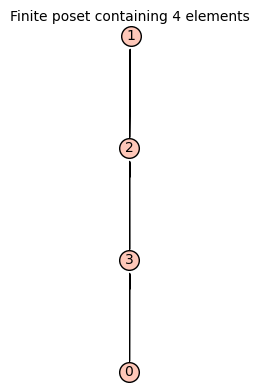

In [54]:
Poset((range(4),four[0]))

In [98]:
def save_plots(posets, folder_name):
    n = posets[0].cardinality()
    for i in range(len(posets)):
        name = folder_name + "/" + str(n) + "_" + str(i) + ".png"
        plot = posets[i].plot()
        plot.save(name)

In [108]:
def allposets(n):
    trees = alltrees(n)
    posets = []
    for tree in trees:
        posets.append(Poset((range(n),tree)))
    return list(set(posets))

In [71]:
load("/home/bach/Documents/SagePKG/NumericalSemigroup.sage")
load("/home/bach/Documents/SagePKG/KunzPoset.sage")

true
Successfully loaded Singular


In [81]:
def kunz_posets(n):
    facfile = '/home/bach/Documents/SagePKG/data/m' + str(n) + '.fac'
    hpfile = '/home/bach/Documents/SagePKG/data/m' + str(n) + '.out'
    ps = KunzPoset.ReadFacesFromNormaliz(face_lattice_file_path=facfile, hplane_file_path=hpfile)
    return [kp.poset for kp in ps]

def bad_posets(n):
    kps = kunz_posets(n)
    ps = allposets(n)
    #sanity_check
    if list(set(kps) - set(ps)) != []: print("bad program")
    else: return list(set(ps) - set(kps))

In [111]:
save_plots(bad_posets(6), "bad_posets_6")

In [110]:
len(set(kunz_posets(5)))

31

In [107]:
len(set(allposets(5)))

71